# Decision Trees:

Decision trees are widely used models for classification and regression tasks. Essentially, they learn a hierarchy of if/else questions, leading to a decision. 

In [1]:
import pandas as pd
import mglearn
import matplotlib 
import pylab as plt
%matplotlib inline

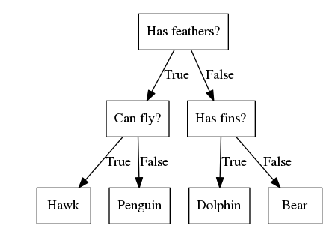

In [2]:
mglearn.plots.plot_animal_tree()

*Figure above shows a decision tree to distinguish among several animals*

In the illustration above, each node in the tree either represents a question or a terminal node (also called a leaf) that contains the answer. The edges connecct the answers to a question with the next question you would ask. 

Learning a decision tree means learning the sequence of if/else questions that gets us to the ture answer most quickly. In the machine learning setting, these questions are called *tests*. Usually data does not come in the form of binary yes/no features as in the above example, but is instead represented as continuous features such as in the 2D dataset shown below. The tests that are used on continuous data are of the for "Is feature i lager than value a?"

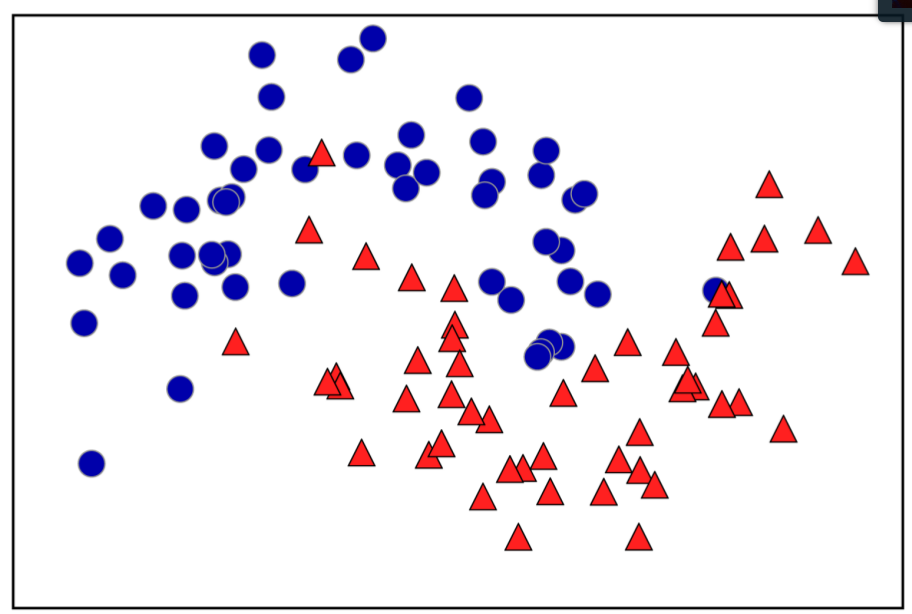

In [3]:
from IPython.display import Image
Image('Decision_tree.png')

*Figure above shows two-moons dataset on which the decision tree will be built*

### Important:

To build a tree, the algorithm searches over all possible tests and finds the one that is most informative about the target variable. In the figure below ( Figure 2-24 ) the first thest is picked. Splitting the dataset horizantaly at  *x[1]=0.0596* yields the most information; it best seperates the points in class 1 from the points in class 2. 
The top node, also called
the root, represents the whole dataset, consisting of 50 points belonging to class 0 and 50 points belonging to class 1. The split is done by testing whether x[1] <= 0.0596 , indicated by a black line. If the test is true, a point is assigned to the left node, which contains 2 points belonging to class 0 and 32 points belonging to class 1. Otherwise the point is assigned to the right node, which contains 48 points belonging to class 0 and 18 points belonging to class 1. These two nodes correspond to the top and bottom regions shown in Figure 2-24. Even though the first split did a good job of separating the two classes, the bottom region still contains points belonging to class 0, and the top region still contains points belonging to class 1. We can build a more accurate model by repeating the process of looking for the best test in both regions.
Figure 2-25 shows that the most informative next split for the left and the right region is based on x[0] .

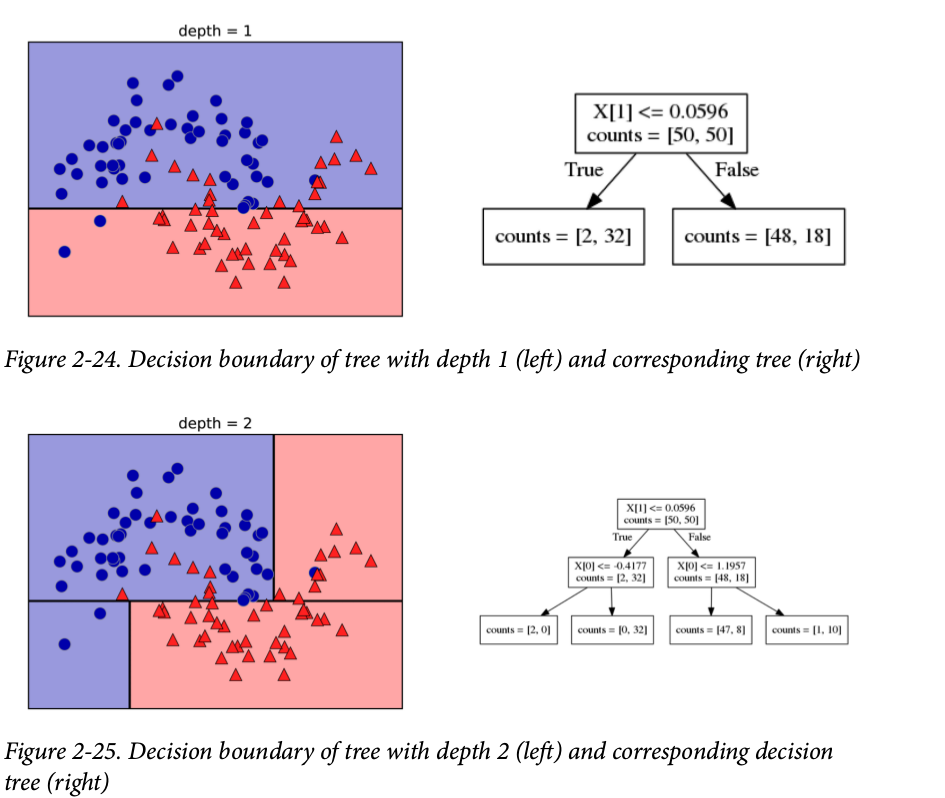

In [4]:
Image('Figure_2_24.png')

This process yields a binary tree of dicisions, which each node containing a test. Alternatively, we can think of each test as splitting the part of the data that is currently being considered along one axis. 

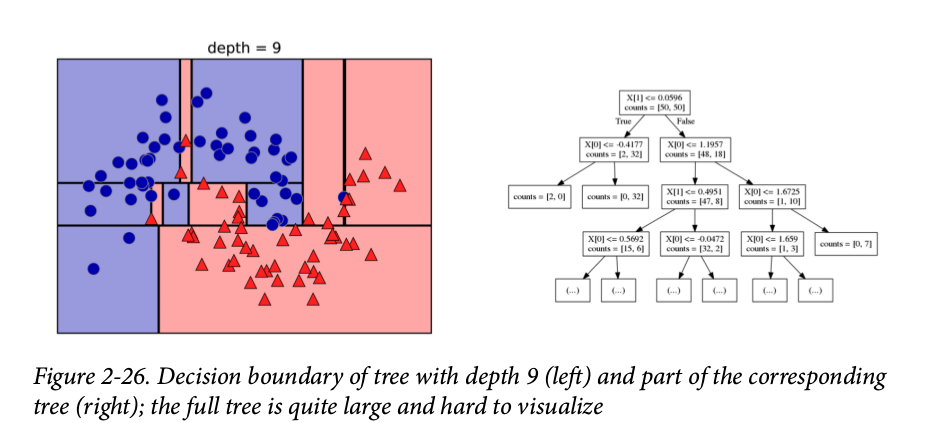

In [5]:
Image('Figure 2_26.png')

### Controlling complexity of decision tress:

If we make our decision tree model very complex, it will be highly overfit to the training data. As a result, we would get 100% accuracy on the training data (see figure 2-26 on the left side). There are two ways to avoid that:
1- Stopping the creation of the tree early (also called *pre-pruning*)
2- Building the tree but then removing or collapsing nodes that contain little information (also called *post-pruning*).

For the *pre-pruning* include limiting the maximum depth of the tree, limiting the maximum number of leaves, or requiring a minimum number of points in a node to keep splitting it. 

#### Important note:
Decision trees in *scikit-learn* are implemented in the *DecisionTreeRegressor* and *DecisionTreeClassifier* classes. *scikit-learn* only used **pre-pruning** but not post-pruning. 
In order to go through an example, I am using the *Breast Cancer* dataset as follows. 

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, 
                                                    stratify=cancer.target, random_state=42)
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)

print('Accuracy on the training set: {:.3f}'.format(tree.score(X_train, y_train)))
print('Accuracy on the test set: {:.3f}'.format(tree.score(X_test, y_test)))


Accuracy on the training set: 1.000
Accuracy on the test set: 0.937


If you need more information about the Breast Cancer dataset, you can find it out as below:

In [12]:
ancer = load_breast_cancer()
print('cancer.keys(): \n {}'.format(cancer.keys()))

cancer.keys(): 
 dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])


In [14]:
import numpy as np
print('Shape of cancer data: {}'.format(cancer.data.shape))
print('Sample count per class is: \n{}'.format(
    {n: v for n, v in zip(cancer.target_names, 
                          np.bincount(cancer.target))}))

Shape of cancer data: (569, 30)
Sample count per class is: 
{'malignant': 212, 'benign': 357}


In [15]:
print('Feature names:\n {}'.format(cancer.feature_names))

Feature names:
 ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
